# In this notebook:

## Univariate regression

### linear dataset with noise --> linear regression

### quadratic dataset with noise --> polynomial regression

## extension to multivariate regression:  >1 input features

## Evaluating model performance:
- standard metrics: RMSE, MSE, MAE, R^2 score
- training/test set split and generalisation error

## the overfitting problem: how to spot and deal with it

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression, make_sparse_uncorrelated

### generating a univariate dataset for regression with a noise factor (0 mean, 1 variance)

In [36]:
# 30 instances
m = 30

# coeff and intercept
coeff_true = 2
intercept_true = 0.5

X = np.linspace(-1,1,m)

rand_noise_mu = 0
rand_noise_std = 0.1

rand_noise = np.random.normal(rand_noise_mu, rand_noise_std, m)
Y_true = intercept_true + coeff_true * X + rand_noise

In [37]:
X = np.reshape(X, (-1, 1))  
print(X.shape)

regr = linear_model.LinearRegression()
regr.fit(X, Y_true)
Y_pred = regr.predict(X)

(30, 1)


In [38]:
intercept = regr.intercept_
coeff = regr.coef_
print('intercept: predicted %f; true %f'% (intercept, intercept_true))
print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

intercept: predicted 0.475885; true 0.500000
coeff: predicted: 2.008099; true 2.000000


### evaluating standard metrics for regression model performance:

In [39]:
print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))



mean squared error: 0.009788
R^2 = 0.993234
range of response variable Y: [-1.416475,2.444753]


### visual rendering of data and the linear fit

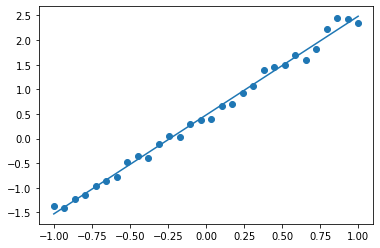

In [40]:
plt.scatter(X, Y_true)
plt.plot(X, Y_pred)
plt.show()

## fitting a nonlinear univariate dataset to a linear model

In [41]:
m= 100
X = 6 * np.random.rand(m,1) - 3

coeff1 = 0.5
coeff2 = 1

Y_true = coeff1 * X**2 + coeff2 * X + 2 + np.random.randn(m,1)
X = np.reshape(X, (-1, 1))

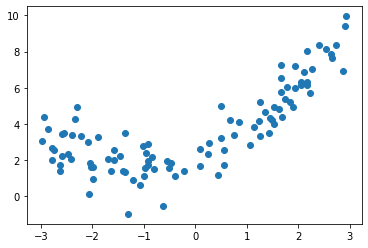

In [42]:
plt.scatter(X, Y_true)

In [43]:
regr = linear_model.LinearRegression()
regr.fit(X, Y_true)
Y_pred = regr.predict(X)

print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))

mean squared error: 2.381819
R^2 = 0.546313
range of response variable Y: [-0.986449,9.953816]


the linear model does not seem to fit the data at all!

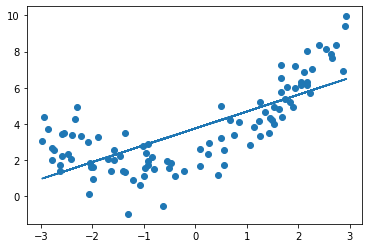

In [44]:
plt.scatter(X, Y_true)
plt.plot(X, Y_pred)
plt.show()

let use try a polynomial regression instead. 

we accomplish this in 2 steps:
- transform the X features into X^2
- fit a linear model to the transformed features

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [46]:
regr = linear_model.LinearRegression()
regr.fit(X_poly, Y_true)
Y_pred = regr.predict(X_poly)

print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X_poly, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))

mean squared error: 0.880909
R^2 = 0.832205
range of response variable Y: [-0.986449,9.953816]


intercept: 
 [2.16653571]
coeff: 
 [[1.00663785 0.48048063]]


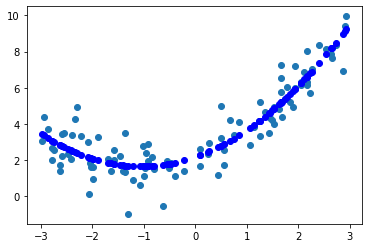

In [47]:
intercept = regr.intercept_
coeff = regr.coef_
print('intercept: \n', intercept)
print('coeff: \n', coeff)

plt.scatter(X, Y_true)
plt.plot(X,Y_pred, "bo")
plt.show()

In [48]:
regr = linear_model.LinearRegression()
regr.fit(X_poly, Y_true)
Y_pred = regr.predict(X_poly)

print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X_poly, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))

mean squared error: 0.880909
R^2 = 0.832205
range of response variable Y: [-0.986449,9.953816]


## we can also generate a synthetic dataset using `sklearn.datasets.make_regression`

this is convenient to illustrate _overfitting_

here we can control the amount of noise. this is the standard deviation of the gaussian noise applied to the output.

### note that we can extend to multivariate regression simply by changing the number of features

In [49]:
n_features= 10
# X, Y_true, coeff_true = make_regression(n_samples=100, n_features=n_features, noise=15.0, random_state=1, coef=True)

# Only the first 4 features are informative. The remaining features are useless.
X, Y_true = make_sparse_uncorrelated(n_samples=100, n_features=100, random_state=True)



In [50]:
regr = linear_model.LinearRegression()
regr.fit(X, Y_true)
Y_pred = regr.predict(X)

intercept = regr.intercept_
coeff = regr.coef_

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))


mean squared error: 0.000000
R^2 = 1.000000
range of response variable Y: [-8.021810,8.181055]


In [51]:
if n_features == 1:
    plt.scatter(X, Y_true)
    plt.plot(X, Y_pred)
    plt.show()

## overfitting: 

### how do we know the model predicts accurately on unseen instances?

In [52]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(X, Y_true, test_size = 0.3, random_state = 10)

In [53]:
regr = linear_model.LinearRegression()
regr.fit(XTrain, YTrain)
intercept = regr.intercept_
coeff = regr.coef_


### note that we are now predicting on the Test set not on the training set

In [54]:
Y_pred = regr.predict(XTest)

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(YTest, Y_pred))
print("R^2 = %f" % regr.score(XTest, YTest))
print('range of response variable Y: [%f,%f]' % (YTest.min(), YTest.max()))

mean squared error: 4.522716
R^2 = 0.557104
range of response variable Y: [-5.968151,6.317723]


### why is this happening?

- perhaps the dataset is not linear (see example above)
- too few instances in the training set (go back and increase the size of the training set and observe the effect)
- model learnt from many irrelevant variables

## Mitigating overfitting through _regularisation_

### 1. Ridge regression

In [55]:
from sklearn.linear_model import Ridge

regr = Ridge(alpha=0.5)
regr.fit(XTrain, YTrain)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
Y_pred = regr.predict(XTest)

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(YTest, Y_pred))
print("R^2 = %f" % regr.score(XTest, YTest))
print('range of response variable Y: [%f,%f]' % (YTest.min(), YTest.max()))

mean squared error: 4.494295
R^2 = 0.559887
range of response variable Y: [-5.968151,6.317723]


### 2. Lasso regression

In [57]:
regr = linear_model.Lasso(alpha=0.1)
regr.fit(XTrain, YTrain)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
Y_pred = regr.predict(XTest)

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(YTest, Y_pred))
print("R^2 = %f" % regr.score(XTest, YTest))
print('range of response variable Y: [%f,%f]' % (YTest.min(), YTest.max()))

mean squared error: 0.598818
R^2 = 0.941360
range of response variable Y: [-5.968151,6.317723]


### 3. ElasticNet

In [59]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha=1.0)
regr.fit(XTrain, YTrain)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
Y_pred = regr.predict(XTest)

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(YTest, Y_pred))
print("R^2 = %f" % regr.score(XTest, YTest))
print('range of response variable Y: [%f,%f]' % (YTest.min(), YTest.max()))

mean squared error: 3.480659
R^2 = 0.659150
range of response variable Y: [-5.968151,6.317723]


In [61]:
!pip install tpot

In [64]:

from tpot import TPOTRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y_true, train_size=0.75, test_size=0.25)

model = TPOTRegressor(generations=5, population_size=50, verbosity=2, scoring='neg_mean_absolute_error', cv=cv)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

model.export('tpot_exported_pipeline_synthetic-data-regression-example.py')


RuntimeError: ignored